In [29]:
import pickle

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

from utils import visualization_evaluation,visualization_y
%matplotlib inline

In [30]:
# some parameters
train_size = 6000

blk_sz, sensitivity = 8, 8
selected_bands = [127, 201, 202, 294]
tree_num = 185
pic_row, pic_col= 600, 1024

dataset_file = f'./dataset/data_{blk_sz}x{blk_sz}_c{len(selected_bands)}_sen{sensitivity}_test.p'
model_file = f'./models/rf_pca_{blk_sz}x{blk_sz}_c{len(selected_bands)}_{tree_num}_1.model'

# 数据集与样本平衡

In [31]:
# 读取数据
with open(dataset_file, 'rb') as f:
    x_list, y_list = pickle.load(f)
# 确保数据当中x和y数量对得上
assert len(x_list) == len(y_list)
print("数据量： ", len(x_list))
x, y = np.asarray(x_list), np.asarray(y_list, dtype=int)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=5,
                                                    shuffle=True, stratify=y)
print(f"x train {x_train.shape}, y train {y_train.shape}\n"
      f"x test {x_test.shape}, y test {y_test.shape}")

数据量：  9600
x train (6720, 8, 8, 4), y train (6720,)
x test (2880, 8, 8, 4), y test (2880,)


total (array([   0.,    0.,    0.,    0.,    0., 9600.,    0.]), array([0, 1, 2, 3, 4, 5, 6, 7]), <BarContainer object of 7 artists>) 
train (array([   0.,    0.,    0.,    0.,    0., 6720.,    0.]), array([0, 1, 2, 3, 4, 5, 6, 7]), <BarContainer object of 7 artists>) 
test (array([   0.,    0.,    0.,    0.,    0., 2880.,    0.]), array([0, 1, 2, 3, 4, 5, 6, 7]), <BarContainer object of 7 artists>)


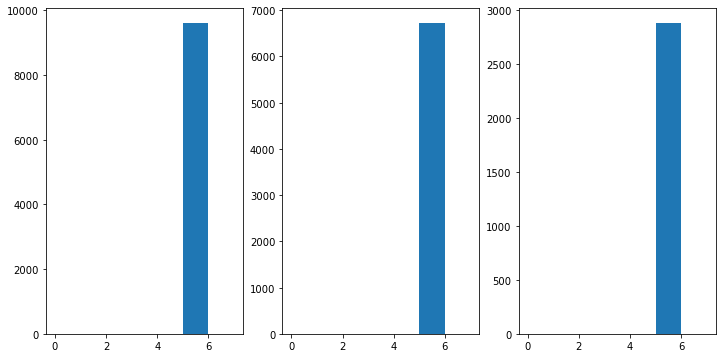

In [32]:
fig, axs = plt.subplots(1, 3, figsize=(12, 6))
hist_res_total = axs[0].hist(y,[0, 1, 2, 3, 4, 5, 6, 7], align='mid')
hist_res_train = axs[1].hist(y_train,[0, 1, 2, 3, 4, 5, 6, 7], align='mid')
hist_res_test = axs[2].hist(y_test,[0, 1, 2, 3, 4, 5, 6, 7], align='mid')
print(f'total {hist_res_total} \n'
      f'train {hist_res_train} \n'
      f'test {hist_res_test}')
plt.show()

In [33]:
# 发现样本实在是不平衡
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
x_train_shape = x_train.shape
x_train = x_train.reshape((x_train.shape[0], -1))
x_resampled, y_resampled = ros.fit_resample(x_train, y_train)
# 画图
fig, axs = plt.subplots(figsize=(10, 6))
hist_res_train = axs.hist(y_resampled, [0, 1, 2, 3, 4, 5, 6, 7], align='mid')
print(f'train {hist_res_train} \n')
plt.show()
# 抽样
x_train, _, y_train, _ =  train_test_split(x_resampled, y_resampled, train_size=train_size, random_state=0,
                                           shuffle=True, stratify=y_resampled)
# 画图
fig, axs = plt.subplots(figsize=(10, 6))
hist_res_train = axs.hist(y_train, [0, 1, 2, 3, 4, 5, 6 ,7], align='mid')
print(f'train {hist_res_train} \n')
plt.show()
x_train = x_train.reshape(x_train.shape[0], x_train_shape[1], x_train_shape[2], x_train_shape[3])
print(len(x_train))

ValueError: The target 'y' needs to have more than 1 class. Got 1 class instead